In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Problem Set 6

### PHYS 441

***

Adam A Miller  
09 November 2022  
version 0.1

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work**. Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## Problem 1) 3 points

During the winter in Evanston it snows on average once every five days. 

You have a professor that studies data science who claims to be smarter than meteorologists. The professor develops a model to predict whether or not it will snow the following day. On 75% of the days when it snows the professor had predicted snow, and on 60% of the days when it does not snow the professor predicted no snow. 

The professor has predicted that it is going to snow tomorrow, what is the probability that it will actually snow?  
How much does this probability differ from the prior?

Let $P(A)$ be the probability that it snows tomorrow, and $P(B)$ be the probability that the professor predicts snow.

We want to find $P(A|B)$, the probability that it actually snows given the professor predicts snow. 

By Bayes theorm, $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$, where $P(B|A)$ is the probability the professor predicts snow given it actually snowed ($0.75$) and $P(A)$ is the probability that it snows tomorrow ($0.2$). 

$P(B) = P(B|A) \cdot P(A) + P(B|\~A) \cdot P(\~A)$. We know $P(\~B|\~A)=0.6$, which means $P(B|\~A)=1-0.6=0.4$. 

Hence $P(B) = P(B|A) \cdot P(A) + P(B|\~A) \cdot P(\~A) = 0.75 \cdot 0.2 + 0.4 \cdot 0.8 = 0.47$. 

Then $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} = \frac{0.75 \cdot 0.2}{0.47} \approx 0.32$. 

The probability is higher than the prior of $0.2$ by $\approx 12$ \%.   

## Problem 2) 7 points

**Problem 2a**

You wish to estimate the parameters of a Gaussian p.d.f. You assign a prior to the model parameters of $\mu_p = 2$ and $\sigma_p = 2$ and collect samples that have sample mean $\bar{x} = 5$ and sample standard deviation $s = 6$. 

Make a plot of the posterior, the prior, and the likelihood over the range $-5 \le x \le 15$. Be sure to clearly label everything in your plot.

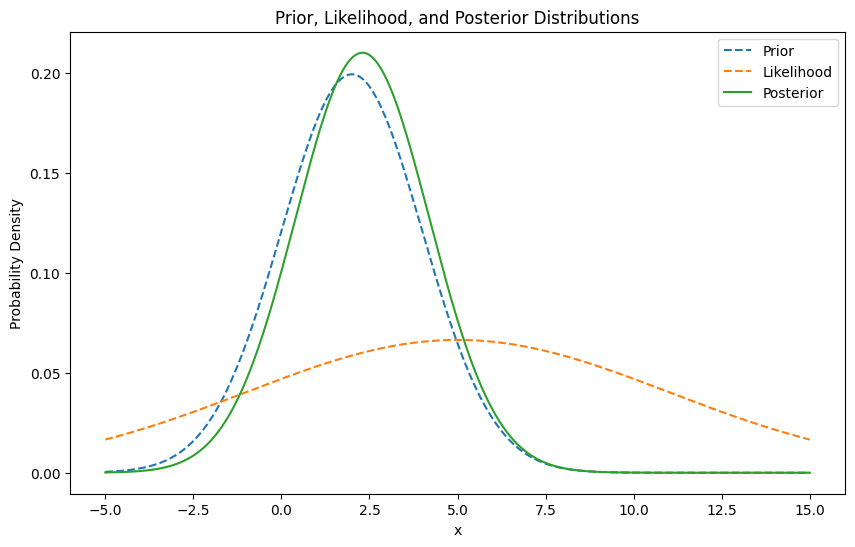

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

prior_mean = 2
prior_std = 2
sample_mean = 5
sample_std = 6

x_values = np.linspace(-5, 15, 1000)

prior = norm.pdf(x_values, prior_mean, prior_std)
likelihood = norm.pdf(x_values, sample_mean, sample_std)

# posterior (proportional to the product of likelihood and prior)
posterior = likelihood * prior
posterior = posterior / np.trapz(posterior, x_values)  # Normalize to make the area under the curve equal to 1

# Plot the prior, likelihood, and posterior
plt.figure(figsize=(10, 6))
plt.plot(x_values, prior, label='Prior', linestyle='--')
plt.plot(x_values, likelihood, label='Likelihood', linestyle='--')
plt.plot(x_values, posterior, label='Posterior')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**Problem 2b**

Using the same prior, you collect more samples and measure $\bar{x} = 4.7$ and $s = 1.8$. Once again plot the posterior, prior, and likelihood. 

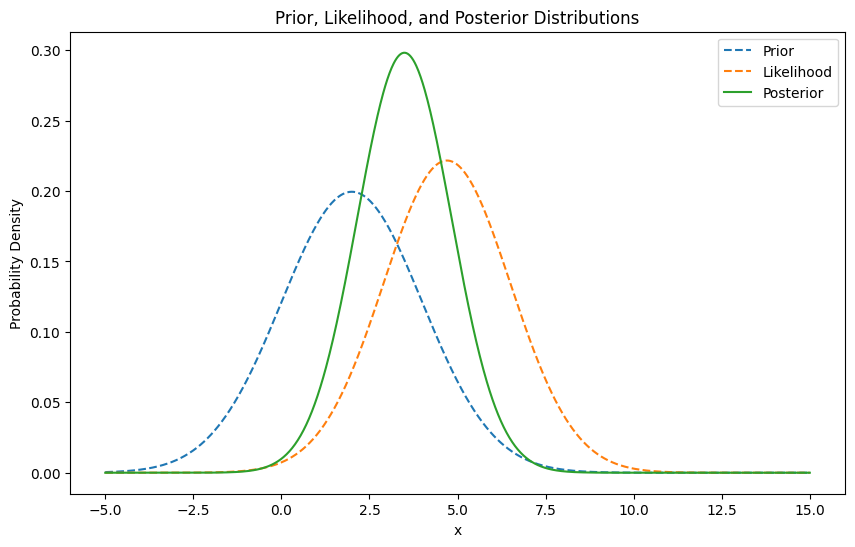

In [118]:
prior_mean = 2
prior_std = 2
sample_mean =4.7
sample_std =1.8

x_values = np.linspace(-5, 15, 1000)

prior = norm.pdf(x_values, prior_mean, prior_std)
likelihood = norm.pdf(x_values, sample_mean, sample_std)

# posterior (proportional to the product of likelihood and prior)
posterior = likelihood * prior
posterior = posterior / np.trapz(posterior, x_values)  # Normalize to make the area under the curve equal to 1

# Plot the prior, likelihood, and posterior
plt.figure(figsize=(10, 6))
plt.plot(x_values, prior, label='Prior', linestyle='--')
plt.plot(x_values, likelihood, label='Likelihood', linestyle='--')
plt.plot(x_values, posterior, label='Posterior')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**Problem 2c**

Using the same prior, you collect more samples and measure $\bar{x} = 5.1$ and $s = 0.84$. Once again plot the posterior, prior, and likelihood. 

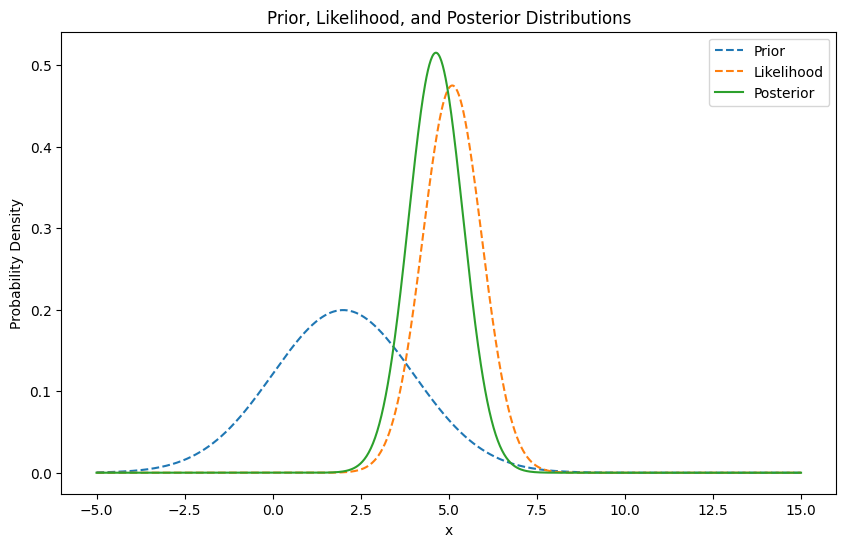

In [119]:
prior_mean = 2
prior_std = 2
sample_mean = 5.1
sample_std = 0.84

x_values = np.linspace(-5, 15, 1000)

prior = norm.pdf(x_values, prior_mean, prior_std)
likelihood = norm.pdf(x_values, sample_mean, sample_std)

# posterior (proportional to the product of likelihood and prior)
posterior = likelihood * prior
posterior = posterior / np.trapz(posterior, x_values)  # Normalize to make the area under the curve equal to 1

# Plot the prior, likelihood, and posterior
plt.figure(figsize=(10, 6))
plt.plot(x_values, prior, label='Prior', linestyle='--')
plt.plot(x_values, likelihood, label='Likelihood', linestyle='--')
plt.plot(x_values, posterior, label='Posterior')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**Problem 2d**

Can you draw any general conclusions about the importance of the prior on the final posterior inference when working with a Gaussian conjugate prior? 

The prior becomes less important as more data is being collected, while the likelihood gradually dominates the shape of the posterior. 



## Problem 3) 60 points

Research on a new drug, that has conveniently been named zipvicor, has shown that it can dramatically reduce the chances that a person suffers from a stroke. An observed side effect from the drug is that it causes excessively dry skin. 

In a study of 75 patients, researchers have found that 14 of them experienced the dry skin condition. The researchers want to know what is the probability of experiencing dry skin due to the drug, and everyone agrees that the binomial distribution is the correct form of the p.d.f. in this case:

$$P(r; n, p) = \frac{n!}{r!(n-r)!}p^r(1-p)^{n-r}$$

For the trial, $n = 75$ and $r = 14$. There are both frequentists and Bayesians attempting to analyze the trial data.

**Problem 3a) 8 points**

The Frequentists naturally propose the Maximum Likelihood method. Show, through explicit calculation, that the ML estimator and its variance are:
$$
 \hat{p}_\mathrm{ML} = \frac{r}{n}  \qquad {\mathrm{and}} \qquad
 \hat{\sigma^2}_\mathrm{ML} = \frac{r (n-r)}{n^3} = \frac{\hat{p}_\mathrm{ML} (1-\hat{p}_\mathrm{ML})}{n} .
$$ 

where the subscript $\mathrm{ML}$ stands for maximum likelihood.

For ML:
\begin{align}
f(r; n, p)      &= \binom{n}{r} p^r (1-p)^{n-r} \\ 
logf(r; n, p)   &= log(\binom{n}{r}) + log(p^r) + log((1-p)^{n-r}) \\ 
                &= log(\binom{n}{r}) + rlog(p) + (n-r)log(1-p) \\ 
\frac{\partial logf(r; n, p)}{\partial p} &= \frac{log(\binom{n}{r}) + rlog(p) + (n-r)log(1-p)}{\partial p} \\ 
                &= \frac{r}{p} - \frac{(n-r)}{1-p} = 0 \\ 
\frac{r}{p}     &= \frac{(n-r)}{1-p} \Rightarrow \hat{p}_{ML}=\frac{r}{n}
\end{align}

For variance:


$ Var(\hat{p}_{ML}) = Var(\frac{\sum^{n}_{n=1}X_{i}}{n}) $ where $X_{i}$ is a single Bernouli random variable. 

$$
Var(\hat{p}_{ML})   = Var(\frac{\sum^{n}_{n=1}X_{i}}{n})  \\ 
                    = \frac{1}{n^2} \sum^{n}_{n=1}Var(X_{i}) \\ 
                    = \frac{1}{n^2} \sum^{n}_{n=1} \hat{p}_{ML} (1-\hat{p}_{ML}) \\ 
                    = \frac{\hat{p}_{ML} (1-\hat{p}_{ML})}{n}
$$

**Problem 3b) 4 points**

What is the value for $\hat{p}_\mathrm{ML}$ and what is the 68\% CL confidence interval?
(In this case you can assume that the pdf for $\hat{p}_\mathrm{ML}$ is very approximately a normal distribution.)

$ \hat{p}_{ML} = \frac{r}{n} = \frac{14}{75} \approx 0.187$

$ \sigma_{\hat{p}_{ML}} = \sqrt{\frac{\hat{p}_{ML} (1-\hat{p}_{ML})}{n}} = \sqrt{\frac{0.187(1-0.187)}{75}} = 0.045 $ 

Confidence Interval = $ (0.187-0.045, 0.187+0.045) = (0.142, 0.232) $

**Problem 3c) 5 points**

The Food and Drug Administration (FDA) will prohibit zipvicor if the fraction
of people taking the drug suffering dry skin is 25% or greater.
They ask the researchers: is $p < 0.25$ at 90% confidence level?
What is the answer?

In [120]:
# z_score at 90% confidence interval 
z_score = 1.645 
p_ml = 0.187
sigma_p_ml = 0.045 
interval = z_score * sigma_p_ml 
print(p_ml-interval, p_ml+interval)

0.112975 0.261025


The upper limit of the 90\% CL interval is larger than 0.25, hence we cannot safely say that $p < 0.25$ with 90\% confidence. 

**Problem 3d) 9 points**

The Bayesians analyzing the data are not happy with these conclusions. They want a pdf for $p$.
Evoking Bayes' Rule, they write
$$
 g(p) = \frac{ P(D|p) \, \pi(p)}{P(D)}
$$
where $g(p)$ is the desired posterior pdf for $p$ and $\pi(p)$ is the prior.
For the present problem, this means
$$
 g(p) = K \, p^r\,(1-p)^{n-r} \, \pi(p)
$$
where $K$ is a normalization constant that could be calculated from the beta function integral
but which also is determined by the normalization condition for $g(p)$.

The Bayesians propose a uniform distribution as the prior, $\pi(p)$.

What is the expression for $g(p)$ in this case, and what is its mode, $p_{\mathrm{mode}}$?

2.3468629030697923e-17 0.18666666666666668


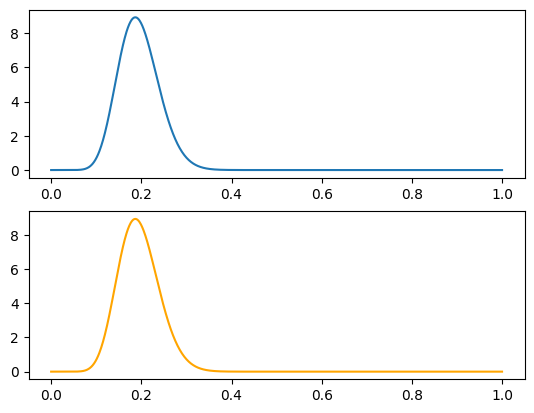

In [121]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt 

thetas = np.linspace(0, 1, 1000)
a = 15 
b = 62

g_p = scipy.stats.beta(a, b).pdf(thetas)

beta_unnormalized = lambda x: x**(a-1) * (1-x)**(b-1)
K = np.trapz(beta_unnormalized(thetas), thetas)
beta_normalized = beta_unnormalized(thetas) / K

mode = (a-1) / (a+b-2)
print(K, mode)

fig, ax = plt.subplots(2, 1)
ax[0].plot(thetas, g_p)
ax[1].plot(thetas, beta_normalized, color='orange')

Since $0 \leq p \leq 1$, $\pi(p) = 1$, so $g(p) = K \, p^r\,(1-p)^{n-r} = 2.34 \cdot 10^{-17} \, p^{14}\,(1-p)^{61}$. 

$p_{\text{mode}} = 0.187 = \hat{p}_{ML}$

**Problem 3e) 4 points**

Given $g(p)$ from part (d), what is the expectation value for $p$, $\mu_p = E[p]$?
What is the 68\% credible interval, taking it to be centered on $\mu_p$? 
(It is probably best to answer this question by writing a program to do the
numerical calculations.)

In [122]:
a = 15 
b = 62 

mu_p = a / (a+b) 
var = (a*b) / ((a+b)**2 * (a+b+1)) 
std = np.sqrt(var) 

print(mu_p, mu_p-std, mu_p+std)

0.19480519480519481 0.1499612873377354 0.23964910227265424


The expectation value for $p$, $\mu_p = E[p] \approx 0.195$. 

The 68\% credible interval is $ (0.1499, 0.2396) $

**Problem 3f) 4 points**

What is the probability that $p > 0.25$?   What is the conclusion of the FDA
in this case, if you interpret "90% CL" to mean $P(p > 0.25) < 0.1$?

In [123]:
thetas = np.linspace(0, 1, 1000)
a = 15 
b = 62

g_p_pdf = scipy.stats.beta(a, b).pdf(thetas)   
g_p_cdf = scipy.stats.beta(a, b).cdf(thetas) 
p_less_than_25 = scipy.stats.beta(a, b).cdf(0.25) 
p_greater_than_25 = 1 - p_less_than_25
print(f"The probablity of p > 0.25 is {p_greater_than_25:.4f}")
print("The FDA should not approve the drug because the probability of p > 0.25 is greater than 0.1. ")

# fig, ax = plt.subplots()
# ax.plot(thetas, g_p)

# ax2 = ax.twinx()
# ax2.plot(thetas, g_p_cdf, color='orange')
# ax2.set_ylabel('CDF')


The probablity of p > 0.25 is 0.1144
The FDA should not approve the drug because the probability of p > 0.25 is greater than 0.1. 


**Problem 3g) 8 points**

One of the Bayesian statisticians argues that a uniform prior $\pi(p)$ is nonsense
and makes the case that $\pi(p) = 1/p$.  A few people tut-tut about improper priors,
but she forges ahead, arguing that $g(p)$ is still integrable, and that's what counts.

Using this new prior, what are $p_{\mathrm{mode}}$, $\mu_p$, and the probability
that $p > 0.25$?

In [124]:
a = 14
b = 62 

mode = (a-1) / (a+b-2) 
mu_p = a / (a+b) 
print(f"p_mode: {mode:.4f}, mu_p: {mu_p:.4f}")

thetas = np.linspace(0, 1, 1000)
# g_p_cdf = scipy.stats.beta(a, b).cdf(thetas) 
p_less_than_25 = scipy.stats.beta(a, b).cdf(0.25) 
p_greater_than_25 = 1 - p_less_than_25
print(f"The probablity of p > 0.25 is {p_greater_than_25:.4f}")


p_mode: 0.1757, mu_p: 0.1842
The probablity of p > 0.25 is 0.0769


**Problem 3h) 4 points**

The FDA is unhappy that the results of the trial seem to be strongly dependent on the method of analysis. They order additional trials of zipvicor, and request that a flat prior be used. In the new trial, $n' = 110$ subjects are tested, and $r' = 24$ have dry skin.

First, is this result consistent with the first?  Use a Frequentist approach
and the test on the difference in means:
$$
   z_D = \frac{ \hat{p}_\mathrm{ML} - \hat{p}'_\mathrm{ML} }{\sqrt{ \hat{\sigma^2}_\mathrm{ML} + \hat{\sigma^2}'_\mathrm{ML}}}
$$
What is the value for $z_D$ and what is the (two-sided) probability to observe
a value for $|z_D|$ as large as this or larger (you can calculate this probability assuming that the $z$ score corresponds to a standard normal, $\mathcal{N}(0,1)$?  

Are the two values compatible? Explain why or why not.

\begin{align}

\hat{p}_\mathrm{ML}     &=  \frac{r}{n}                                     = \frac{14}{75} \\ 
\hat{p}'_\mathrm{ML}    &= \frac{r'}{n'}                                    = \frac{24}{110} \\ 
\hat{\sigma^2}_\mathrm{ML}  &= \frac{\hat{p}_{ML} (1-\hat{p}_{ML})}{n}      = \frac{\frac{14}{75}(1-\frac{14}{75})}{75}\\  
\hat{\sigma^2}'_\mathrm{ML} &= \frac{\hat{p}'_{ML} (1-\hat{p}'_{ML})}{n}    = \frac{\frac{24}{110}(1-\frac{24}{110})}{110}\\ 
z_D                     &= -0.527085
\end{align}

The two-sided probability ($P(x \leq -Z \text{ or } x \ \ge Z)$) is $ 0.5981 $. 

The two values are compatible, since the z score indicates the difference between two trails is less than one standard deviation. 

**Problem 3i) 5 points**

For the pooled sample, and using the flat prior as in **3d**, calculate $p_{\mathrm{mode}}$,
$\mu_p$, and $P(p > 0.25)$.  Will the FDA official grant permission to use zipvicor?

In [125]:
print('='*30)
print('Results from 3d: ')

a = 14+1 
b = (75-14)+1 

mode = (a-1) / (a+b-2)
mu_p = a / (a+b) 
thetas = np.linspace(0, 1, 1000)
p_less_than_25 = scipy.stats.beta(a, b).cdf(0.25) 
p_greater_than_25 = 1 - p_less_than_25

print(f"p_mode: {mode:.4f}, mu_p: {mu_p:.4f}, probablity of p > 0.25 is {p_greater_than_25:.4f}")

print('='*30)
print('Results of pooled sample: ')

a = 14+24+1
b = (75-14)+(110-24)+1 

mode = (a-1) / (a+b-2)
mu_p = a / (a+b) 
thetas = np.linspace(0, 1, 1000)
p_less_than_25 = scipy.stats.beta(a, b).cdf(0.25) 
p_greater_than_25 = 1 - p_less_than_25

print(f"p_mode: {mode:.4f}, mu_p: {mu_p:.4f}, probablity of p > 0.25 is {p_greater_than_25:.4f}")

print('='*30)


Results from 3d: 
p_mode: 0.1867, mu_p: 0.1948, probablity of p > 0.25 is 0.1144
Results of pooled sample: 
p_mode: 0.2054, mu_p: 0.2086, probablity of p > 0.25 is 0.0856


**Problem 3j) 5 points**

Notice that $\mu_p$ increased but $P(p > 0.25)$ decreased.  
Also $p_{\mathrm{mode}}$ and $\mu_p$ are now closer together
in value.

Explain each of these two conclusions.

mu_p increased because the rate of dry skin (24/110) is higher in the second trial than the first (14/75).
The decrease in P(p<0.25) is because of the curve being more narrow, indicating less uncertainty of the parameter.
The mode being more closer to the mean indicates a more 'symmetric' curve. 


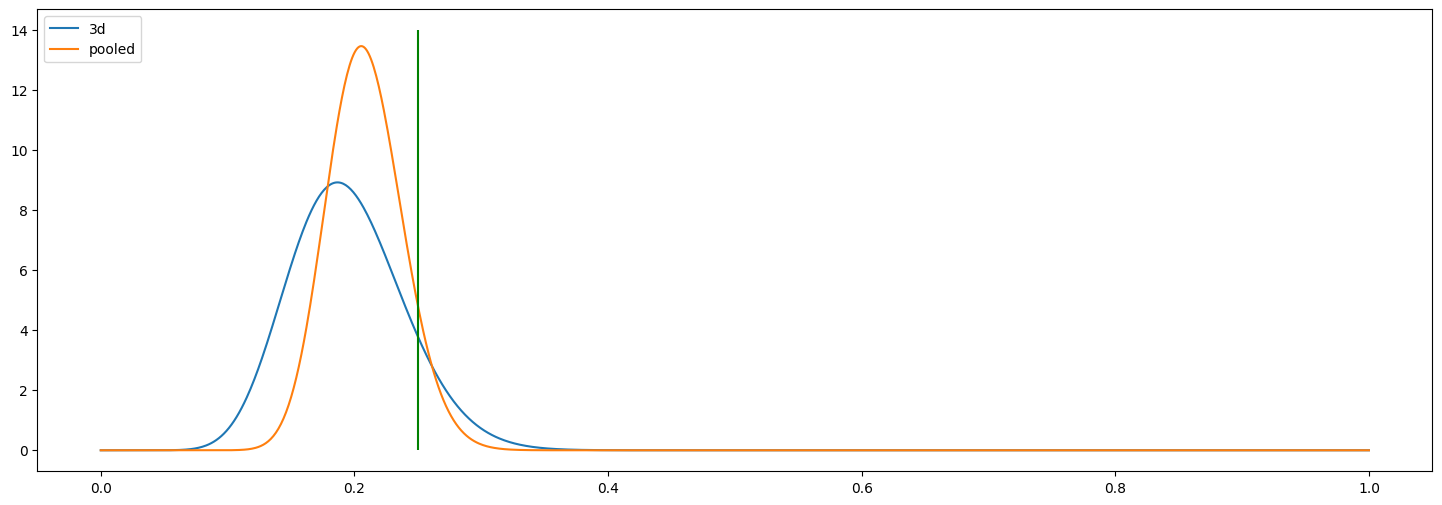

In [126]:
thetas = np.linspace(0, 1, 1000)

a = 14+1 
b = (75-14)+1 
g_p_3d = scipy.stats.beta(a, b).pdf(thetas)

a = 14+24+1
b = (75-14)+(110-24)+1 
g_p_pooled = scipy.stats.beta(a, b).pdf(thetas)

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(thetas, g_p_3d, label='3d')
ax.plot(thetas, g_p_pooled, label='pooled')
ax.vlines(x=0.25, ymin=0, ymax=14, colors='green')
ax.legend(loc='upper left')

print("mu_p increased because the rate of dry skin (24/110) is higher in the second trial than the first (14/75).")
print("The decrease in P(p<0.25) is because of the curve being more narrow, indicating less uncertainty of the parameter.") 
print("The mode being more closer to the mean indicates a more 'symmetric' curve. ")

**Problem 3k) 7 points**

Provide a single plot with three curves showing $g(p)$ for 
parts **3e**, **3g**, and **3i**. Label the curves clearly.

The curves for (e) and (g) are different, but not very different.  What does this
same about the relative importance of the prior and the data, for this problem?

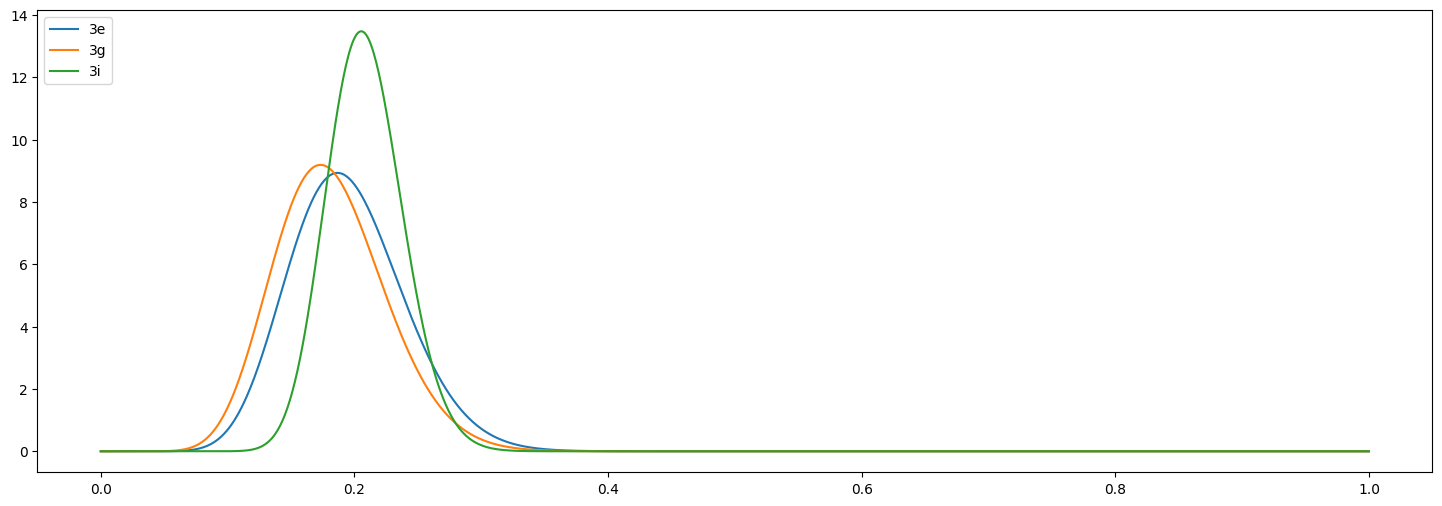

In [127]:
thetas = np.linspace(0, 1, 1000)

a = 14+1 
b = (75-14)+1 
g_p_e = scipy.stats.beta(a, b).pdf(thetas)

a = 13+1
b = (75-13)+1 
g_p_g = scipy.stats.beta(a, b).pdf(thetas)

a = 14+24+1
b = (75-14)+(110-24)+1 
g_p_i = scipy.stats.beta(a, b).pdf(thetas)

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(thetas, g_p_e, label='3e')
ax.plot(thetas, g_p_g, label='3g')
ax.plot(thetas, g_p_i, label='3i')
ax.legend(loc='upper left')

The fact that 3e and 3g are different shows the impact of choosing a different prior can have on the posterior. However, given that the two distributions are not that different, we can see that in this case the data has more of an influence to the posterior rather than the prior. Hence, the data (or likelihood) is more important in this case than the prior. 